In [1]:
import pandas as pd
import os
from datetime import date
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel,VarianceThreshold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
DATA_COUNT=1000
NO_CLASSES=11
date = date.today()
folder_path = ''
dataset1_path=os.path.join(folder_path,"data1")
result_main_path=os.path.join(folder_path,"results")

In [3]:
dataset = pd.read_csv(os.path.join(dataset1_path,"balanced_all_12_processed.csv"))#read dataset that was created

In [4]:
dataset.shape#print the shape rows and colomns

(12340, 82)

In [5]:
X = dataset.drop(['Label'], axis=1)#except the lable extract all the features
y = dataset['Label']#except the lable extract all the Lables

In [6]:
X.shape,y.shape #print features and print shape 

((12340, 81), (12340,))

### random forest


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=20)#divide features and lables as train and test data  

In [9]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 3000)) # initalize randomforest feature extractor
sel.fit(X_train, y_train) # fit the data into the model and train

SelectFromModel(estimator=RandomForestClassifier(n_estimators=3000))

In [10]:
selected_feat= X.columns[(sel.get_support())] # select the features
len(selected_feat)# print the features that were selected 

21

In [11]:
print(selected_feat)

Index(['Source Port', 'Destination Port', 'Flow Duration',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Flow Bytes/s',
       'Fwd IAT Total', 'Fwd Header Length', 'Fwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'ACK Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Bytes', 'min_seg_size_forward',
       'Inbound'],
      dtype='object')


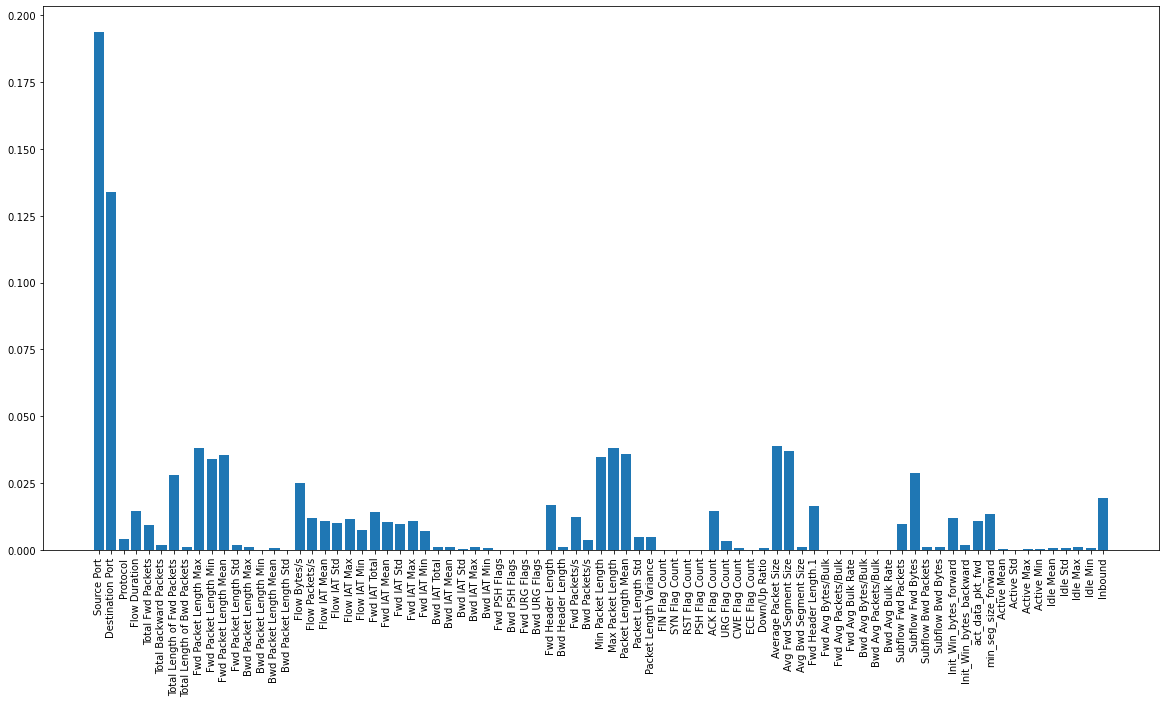

In [14]:
fig = plt.figure(figsize = (20, 10))
x_list=[]
for col in X.columns:
    x_list.append(col)    
y_list=sel.estimator_.feature_importances_

plt.bar( x_list,y_list)
plt.xticks(rotation = 90)
plt.savefig('features.png')
plt.show()
#importance of the 81 feature plotted

In [15]:
X_selected=X[selected_feat]#create new data frame with the selected 21 features

In [16]:
X_selected.to_csv(os.path.join(dataset1_path,"features.csv"), encoding='utf-8', index=False)#features are svaed inside the file
y.to_csv(os.path.join(dataset1_path,"labels.csv"), encoding='utf-8', index=False)#lables are saved inside lables.csv